#### Cross-asset Correlation of the US Economy

In [1]:
# Import packages
import pandas as pd 
import numpy as np
import yfinance as yf
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
#import data
#bond = the bond of the country, stock = the stock/index being analysed
ticker = ['^TNX', '^GSPC']
start = '1990-01-01'
end = '2020-12-31'
df = pd.DataFrame(yf.download(ticker, start, end)['Adj Close'])
df = df.rename(columns = {list(df)[1]: 'Bond', list(df)[0]: 'Stock'})

# try and expect are used in situations where, if running more than once, will result in an error
try:
    df = df.dropna()
except:
    pass

[*********************100%***********************]  2 of 2 completed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7779 entries, 1990-01-02 00:00:00-05:00 to 2020-12-30 00:00:00-05:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Stock   7779 non-null   float64
 1   Bond    7779 non-null   float64
dtypes: float64(2)
memory usage: 182.3 KB


In [4]:
# Partition into different data sets by date
sdf90 = df['1990':'2000']
sdf00 = df['2000':'2010']
sdf10 = df['2010':'2020']

In [5]:
# create a new data frame with the log returns of both the bond and asset
log_df = pd.DataFrame()

for col in df.columns:
    # loops through each column in the data frame, calculates the log return, and adds it to a new data frame
    log_df[col] = np.log(df[col] / df[col].shift(1))
    
log_df = log_df.dropna()

In [6]:
# Partition into different data sets by date
df90 = log_df['1990':'2000']
df00 = log_df['2000':'2010']
df10 = log_df['2010':'2020']

In [7]:
#calculate correlations of each time frame
#1990 - 2000
c90p = sp.pearsonr(df90.Stock, df90.Bond)
c90s = sp.spearmanr(df90.Stock, df90.Bond)
d90 = [c90p[0], c90p[1], c90s[0], c90s[1]]
#2000 - 2010
c00p = sp.pearsonr(df00.Stock, df00.Bond)
c00s = sp.spearmanr(df00.Stock, df00.Bond)
d00 = [c00p[0], c00p[1], c00s[0], c00s[1]]
#2010 - 2020
c10p = sp.pearsonr(df10.Stock, df10.Bond)
c10s = sp.spearmanr(df10.Stock, df10.Bond)
d10 = [c10p[0], c10p[1], c10s[0], c10s[1]]

#present the correlations in a data frame
data = {'1990 - 2000': d90, '2000 - 2010': d00, '2010 - 2020': d10}
corr_df = pd.DataFrame(data, index = ['Pearson', 'p-value', 'Spearman', 'p-value'])
corr_df.round(3)

,1990 - 2000,2000 - 2010,2010 - 2020
Pearson,-0.196,0.332,0.443
p-value,0.000,0.000,0.000
Spearman,-0.251,0.271,0.401
p-value,0.000,0.000,0.000


In [8]:
#calculate covariance of each time frame
#1990 - 2000
c90 = np.cov(d90)
#2000 - 2010
c00 = np.cov(d00)
#2010 - 2020
c10 = np.cov(d10)

#present the correlations in a data frame
data = {'1990 - 2000': c90, '2000 - 2010': c00, '2010 - 2020': c10}
corr_df = pd.DataFrame(data, index = ['Covariance'])
corr_df.round(3)

,1990 - 2000,2000 - 2010,2010 - 2020
Covariance,0.017,0.031,0.06


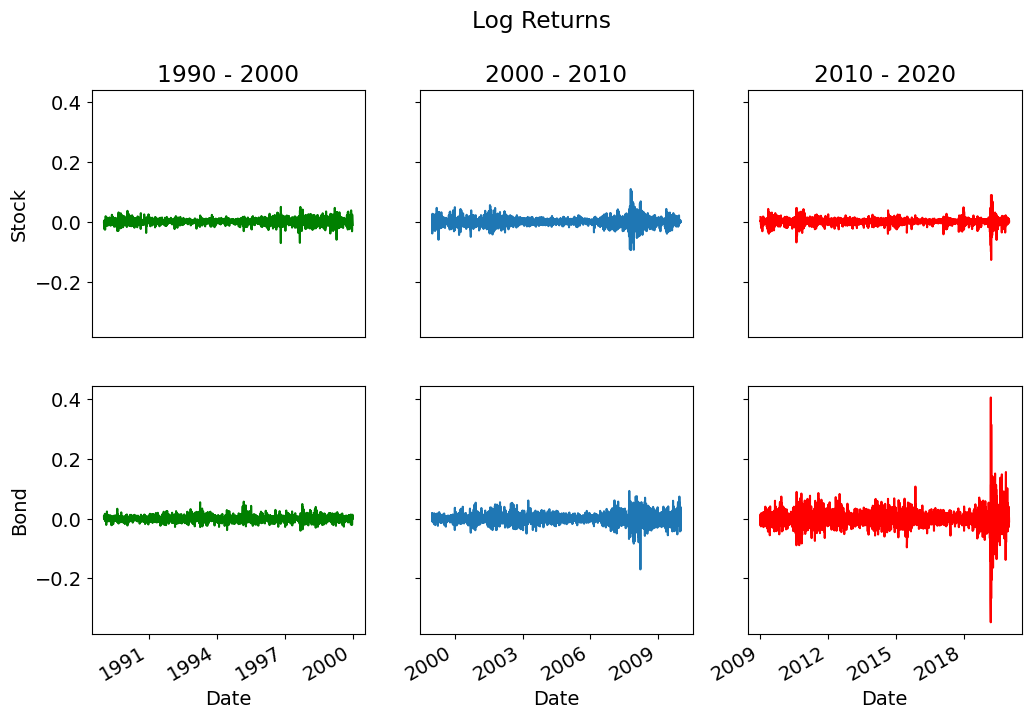

In [9]:
#creation of a subplot to show a comparison of the log returns between the stocks and bonds in different time frames
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 3, figsize=(12, 8), 
                       sharex = False, sharey = True)

#Plotting 1990 - 2000
ax[0][0].set_title('1990 - 2000')
df90.Stock.plot(ax = ax[0][0], color = 'g', label = 'Stock')
ax[0][0].get_xaxis().set_visible(False)
df90.Bond.plot(ax = ax[1][0], color = 'g', label = 'Bond')
ax[1][0].xaxis.set_major_locator(mdates.YearLocator(3))

#Plotting 2000 - 2010
ax[0][1].set_title('2000 - 2010')
df00.Stock.plot(ax = ax[0][1], label = 'Stock')
ax[0][1].get_xaxis().set_visible(False)
df00.Bond.plot(ax = ax[1][1], label = 'Bond')
ax[1][1].xaxis.set_major_locator(mdates.YearLocator(3))

#Plotting 2010 - 2020
ax[0][2].set_title('2010 - 2020')
df10.Stock.plot(ax = ax[0][2], color = 'r', label = 'Stock')
ax[0][2].get_xaxis().set_visible(False)
df10.Bond.plot(ax = ax[1][2], color = 'r', label = 'Bond')
ax[1][2].xaxis.set_major_locator(mdates.YearLocator(3))

fig.suptitle('Log Returns')

ax[0][0].set(ylabel = 'Stock')
ax[1][0].set(ylabel = 'Bond', xlabel = 'Date')

#plt.savefig('AssetCorrelationLogUS.png')
#plt.tight_layout()

plt.show()

PearsonRResult(statistic=0.29048617584669345, pvalue=4.34209453507389e-151)


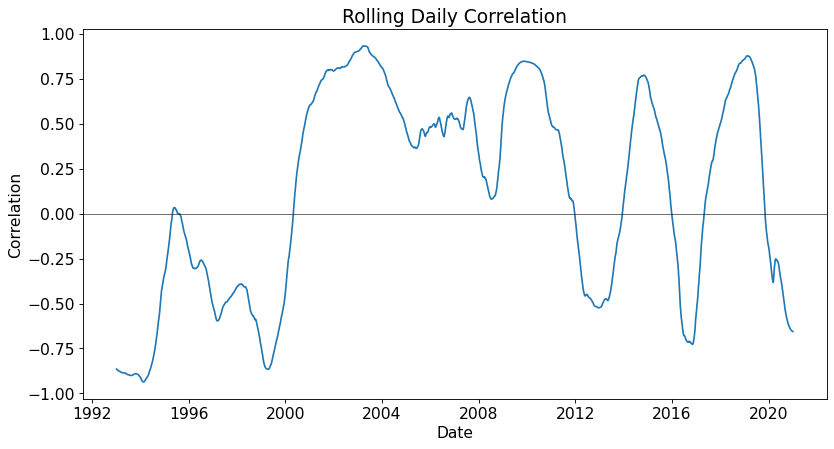

In [19]:
# Calculating a daily correlation
from matplotlib.pyplot import figure

rolling_corr = df.Stock.rolling((252*3)).corr(df.Bond)

# Plotting the correlation
figure(figsize=(12, 6), dpi=80)
plt.plot(rolling_corr)

plt.title('Rolling Daily Correlation')
plt.ylabel('Correlation')
plt.xlabel('Date')

plt.axhline(y = 0.0, color= 'black', linestyle = '-', linewidth = 0.5)

#plt.savefig('RollingCorrelationUS.png')
#plt.tight_layout()

avg_corr = sp.pearsonr(log_df.Stock, log_df.Bond)
print(avg_corr)